In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
housing = pd.read_csv('/Users/salilketkar/thinkful/DS_Unit3/melbourne-housing-market/Melbourne_housing_FULL.csv')
print(housing.shape)
housing['years_old'] = housing['YearBuilt'].apply(lambda x: 2018-x)
print(housing.dtypes)
pd.set_option('display.max_columns', 30)
housing.head()




(34857, 21)
Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
years_old        float64
dtype: object


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,years_old
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,NaN
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,NaN
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,118.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,NaN
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,118.0


### Feature engineering - distance

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


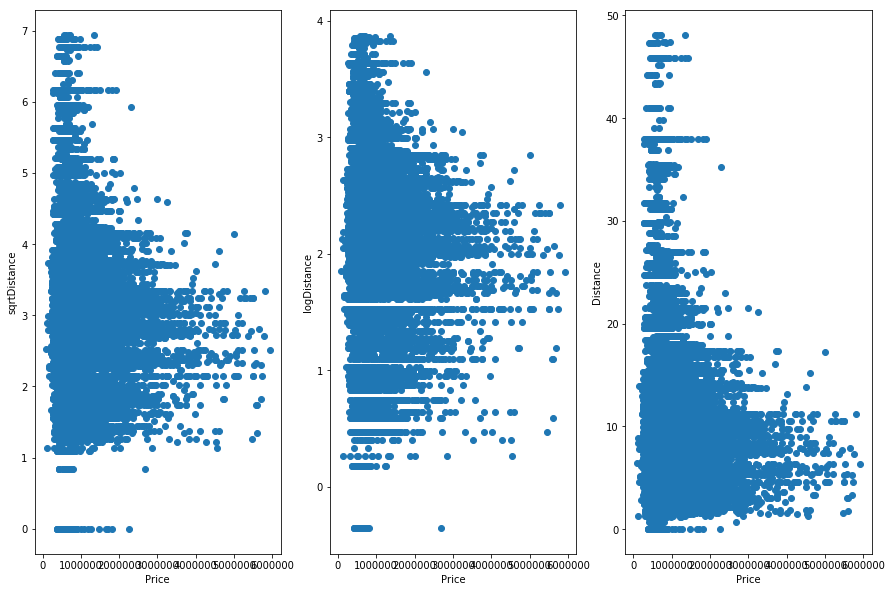

                 Price  Distance  sqrtDistance  logDistance
Price         1.000000 -0.213907     -0.200332    -0.180873
Distance     -0.213907  1.000000      0.975467     0.909584
sqrtDistance -0.200332  0.975467      1.000000     0.975059
logDistance  -0.180873  0.909584      0.975059     1.000000


In [3]:
new1= housing[['Price','Distance']]
new1.dropna(inplace=True)
new1 = new1[new1['Price'] < 6000000]
new1['sqrtDistance'] = new1['Distance'].apply(lambda x: x**0.5)
new1['logDistance'] = new1['Distance'].apply(lambda x: np.log(x)) 

plt.figure(figsize=(15,10))
plt.subplot(131)
plt.scatter(new1['Price'],new1['sqrtDistance'])
plt.xlabel('Price')
plt.ylabel('sqrtDistance')

plt.subplot(132)
plt.scatter(new1['Price'],new1['logDistance'])
plt.xlabel('Price')
plt.ylabel('logDistance')


plt.subplot(133)
plt.scatter(new1['Price'],new1['Distance'])
plt.xlabel('Price')
plt.ylabel('Distance')
plt.show()

print(new1.corr())

### Feature engineering - Rooms

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


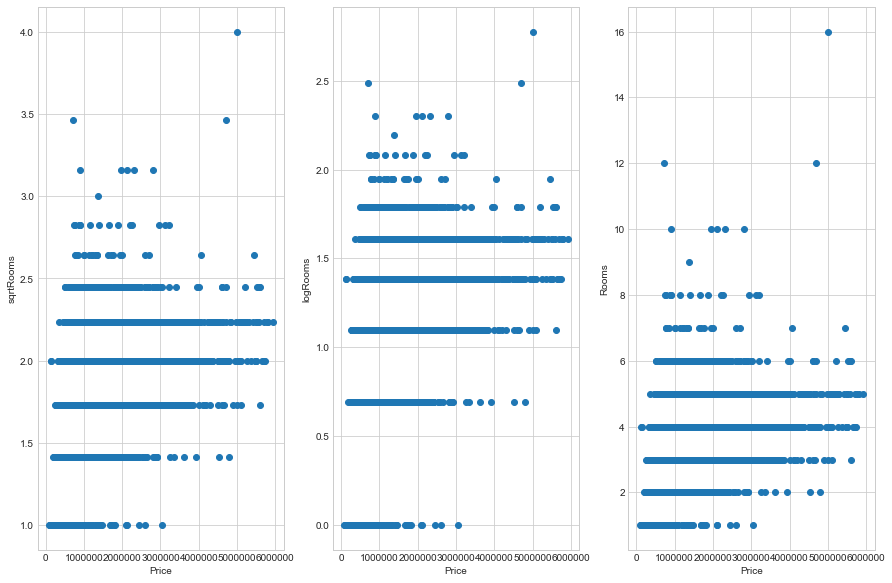

              Price     Rooms  sqrtRooms  logRooms
Price      1.000000  0.472103   0.467674  0.453942
Rooms      0.472103  1.000000   0.990738  0.963038
sqrtRooms  0.467674  0.990738   1.000000  0.990416
logRooms   0.453942  0.963038   0.990416  1.000000


In [68]:
new2= housing[['Price','Rooms']]
new2.dropna(inplace=True)
new2 = new2[new2['Price'] < 6000000]
new2['sqrtRooms'] = new2['Rooms'].apply(lambda x: x**0.5)
new2['logRooms'] = new2['Rooms'].apply(lambda x: np.log(x)) 

plt.figure(figsize=(15,10))
plt.subplot(131)
plt.scatter(new2['Price'],new2['sqrtRooms'])
plt.xlabel('Price')
plt.ylabel('sqrtRooms')

plt.subplot(132)
plt.scatter(new2['Price'],new2['logRooms'])
plt.xlabel('Price')
plt.ylabel('logRooms')


plt.subplot(133)
plt.scatter(new2['Price'],new2['Rooms'])
plt.xlabel('Price')
plt.ylabel('Rooms')
plt.show()

print(new2.corr())

### Feature Engineering - Bedrooms

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


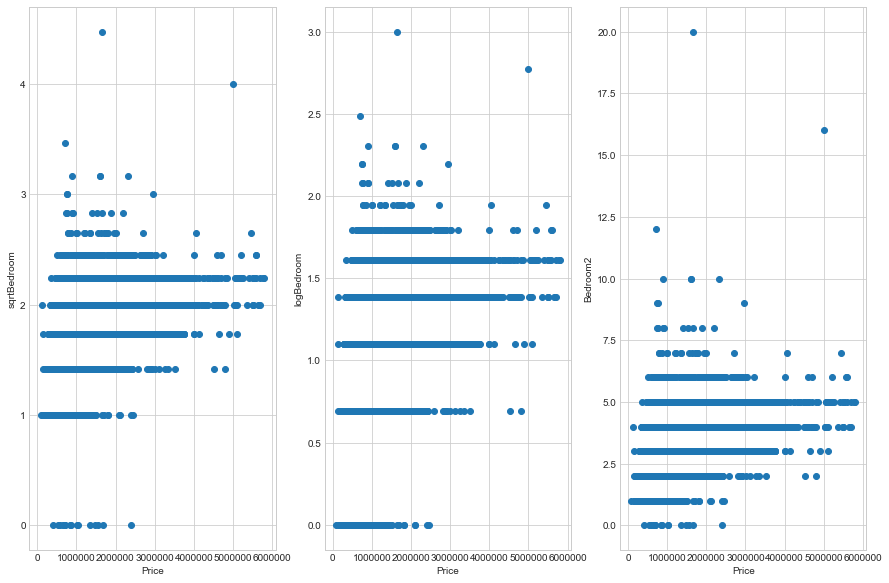

                Price  Bedroom2  sqrtBedroom  logBedroom
Price        1.000000  0.435399     0.430320    0.425440
Bedroom2     0.435399  1.000000     0.986060    0.959527
sqrtBedroom  0.430320  0.986060     1.000000    0.989938
logBedroom   0.425440  0.959527     0.989938    1.000000


In [73]:
new3= housing[['Price','Bedroom2']]
new3.dropna(inplace=True)
new3 = new3[new3['Price'] < 6000000]
new3['sqrtBedroom'] = new3['Bedroom2'].apply(lambda x: x**0.5)
new3['logBedroom'] = new3['Bedroom2'].apply(lambda x: np.log(x)) 

plt.figure(figsize=(15,10))
plt.subplot(131)
plt.scatter(new3['Price'],new3['sqrtBedroom'])
plt.xlabel('Price')
plt.ylabel('sqrtBedroom')

plt.subplot(132)
plt.scatter(new3['Price'],new3['logBedroom'])
plt.xlabel('Price')
plt.ylabel('logBedroom')


plt.subplot(133)
plt.scatter(new3['Price'],new3['Bedroom2'])
plt.xlabel('Price')
plt.ylabel('Bedroom2')
plt.show()

print(new3.corr())

### Feature engineering - Landsize  x**1/5

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


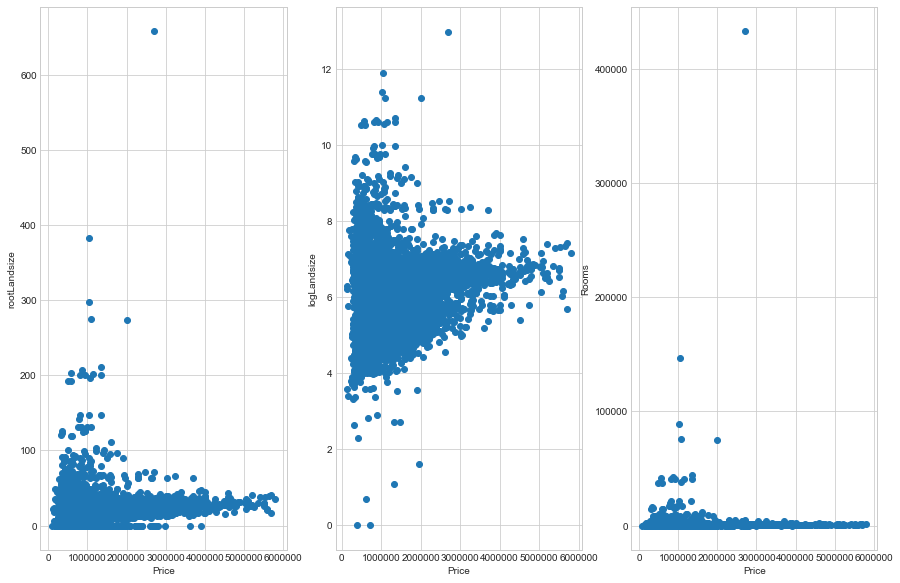

                 Price  Landsize  rootLandsize  logLandsize
Price         1.000000  0.032827      0.190992     0.136821
Landsize      0.032827  1.000000      0.649501     0.273039
rootLandsize  0.190992  0.649501      1.000000     0.787530
logLandsize   0.136821  0.273039      0.787530     1.000000


In [74]:
new4= housing[['Price','Landsize']]
new4.dropna(inplace=True)
new4 = new4[new4['Price'] < 6000000]
new4['rootLandsize'] = new4['Landsize'].apply(lambda x: x**(.5))
new4['logLandsize'] = new4['Landsize'].apply(lambda x: np.log(x)) 

plt.figure(figsize=(15,10))
plt.subplot(131)
plt.scatter(new4['Price'],new4['rootLandsize'])
plt.xlabel('Price')
plt.ylabel('rootLandsize')

plt.subplot(132)
plt.scatter(new4['Price'],new4['logLandsize'])
plt.xlabel('Price')
plt.ylabel('logLandsize')


plt.subplot(133)
plt.scatter(new4['Price'],new4['Landsize'])
plt.xlabel('Price')
plt.ylabel('Rooms')
plt.show()

print(new4.corr())

 ### Feature engineering - years old

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


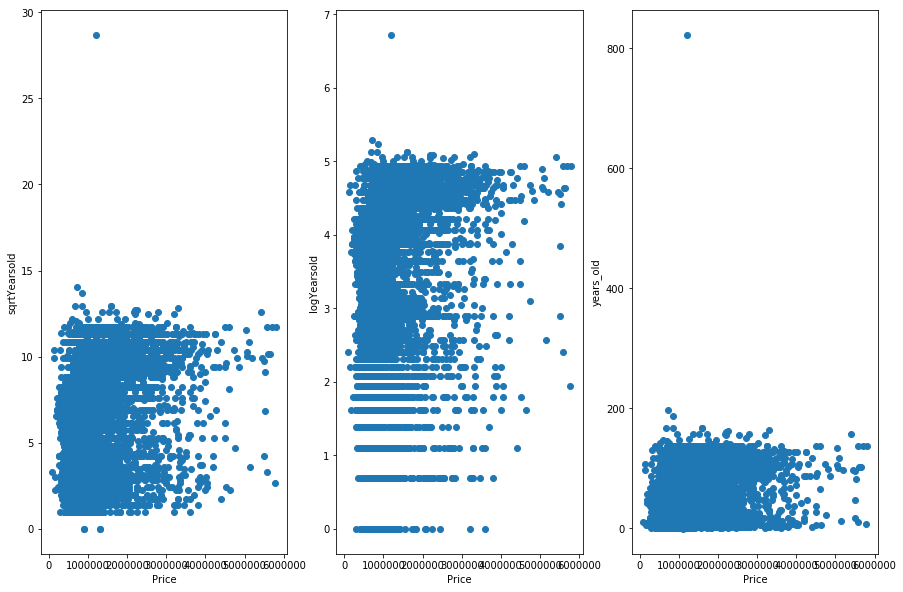

                 Price  years_old  sqrtYearsold  logYearsold
Price         1.000000   0.336340      0.292598     0.218197
years_old     0.336340   1.000000      0.970622     0.878935
sqrtYearsold  0.292598   0.970622      1.000000     0.963256
logYearsold   0.218197   0.878935      0.963256     1.000000


In [7]:
new5= housing[['Price','years_old']]
new5.dropna(inplace=True)
new5 = new5[new5['Price'] < 6000000]
new5['sqrtYearsold'] = new5['years_old'].apply(lambda x: np.sqrt(x))
new5['logYearsold'] = new5['years_old'].apply(lambda x: np.log(x)) 

plt.figure(figsize=(15,10))
plt.subplot(131)
plt.scatter(new5['Price'],new5['sqrtYearsold'])
plt.xlabel('Price')
plt.ylabel('sqrtYearsold')

plt.subplot(132)
plt.scatter(new5['Price'],new5['logYearsold'])
plt.xlabel('Price')
plt.ylabel('logYearsold')


plt.subplot(133)
plt.scatter(new5['Price'],new5['years_old'])
plt.xlabel('Price')
plt.ylabel('years_old')
plt.show()

print(new5.corr())

### Feature engineering - Building area  log(x)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


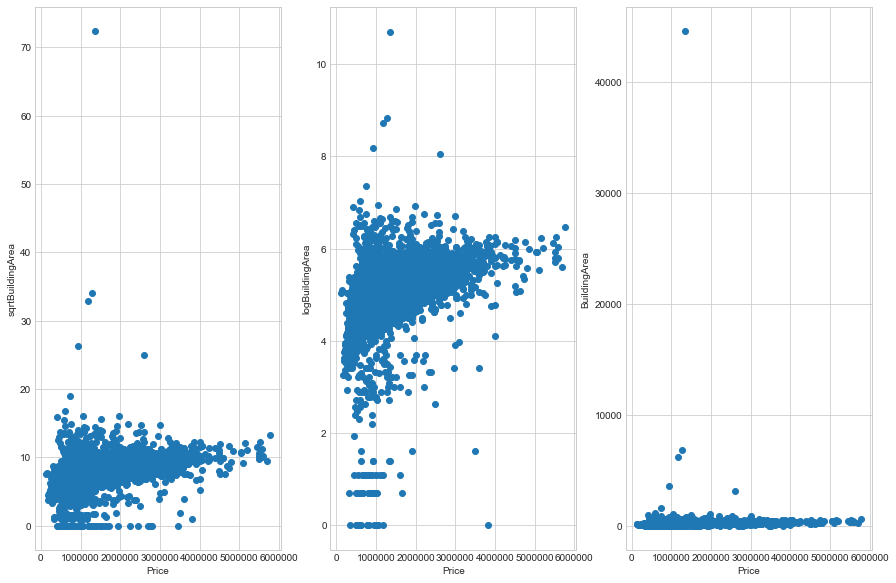

                     Price  BuildingArea  sqrtBuildingArea  logBuildingArea
Price             1.000000      0.101281          0.443142         0.448460
BuildingArea      0.101281      1.000000          0.552470         0.271655
sqrtBuildingArea  0.443142      0.552470          1.000000         0.903979
logBuildingArea   0.448460      0.271655          0.903979         1.000000


In [82]:
new6= housing[['Price','BuildingArea']]
new6.dropna(inplace=True)
new6 = new6[new6['Price'] < 6000000]
new6['sqrtBuildingArea'] = new6['BuildingArea'].apply(lambda x: x**(0.4))
new6['logBuildingArea'] = new6['BuildingArea'].apply(lambda x: np.log(x)) 

plt.figure(figsize=(15,10))
plt.subplot(131)
plt.scatter(new6['Price'],new6['sqrtBuildingArea'])
plt.xlabel('Price')
plt.ylabel('sqrtBuildingArea')

plt.subplot(132)
plt.scatter(new6['Price'],new6['logBuildingArea'])
plt.xlabel('Price')
plt.ylabel('logBuildingArea')


plt.subplot(133)
plt.scatter(new6['Price'],new6['BuildingArea'])
plt.xlabel('Price')
plt.ylabel('BuildingArea')
plt.show()

print(new6.corr())

### Feature engineering - property count x**1/3

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


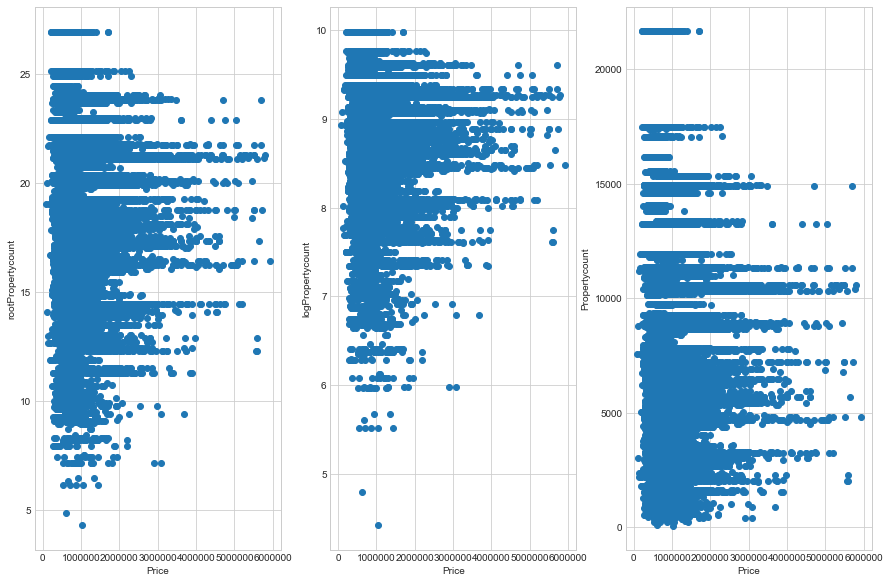

                      Price  Propertycount  rootPropertycount  \
Price              1.000000      -0.060625          -0.024014   
Propertycount     -0.060625       1.000000           0.965771   
rootPropertycount -0.024014       0.965771           1.000000   
logPropertycount  -0.005458       0.915492           0.987609   

                   logPropertycount  
Price                     -0.005458  
Propertycount              0.915492  
rootPropertycount          0.987609  
logPropertycount           1.000000  


In [103]:
new7= housing[['Price','Propertycount']]
new7.dropna(inplace=True)
new7 = new7[new7['Price'] < 6000000]
new7['rootPropertycount'] = new7['Propertycount'].apply(lambda x: x**.33)
new7['logPropertycount'] = new7['Propertycount'].apply(lambda x: np.log(x)) 

plt.figure(figsize=(15,10))
plt.subplot(131)
plt.scatter(new7['Price'],new7['rootPropertycount'])
plt.xlabel('Price')
plt.ylabel('rootPropertycount')

plt.subplot(132)
plt.scatter(new7['Price'],new7['logPropertycount'])
plt.xlabel('Price')
plt.ylabel('logPropertycount')


plt.subplot(133)
plt.scatter(new7['Price'],new7['Propertycount'])
plt.xlabel('Price')
plt.ylabel('Propertycount')
plt.show()

print(new7.corr())

### Feature engineering - Car

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


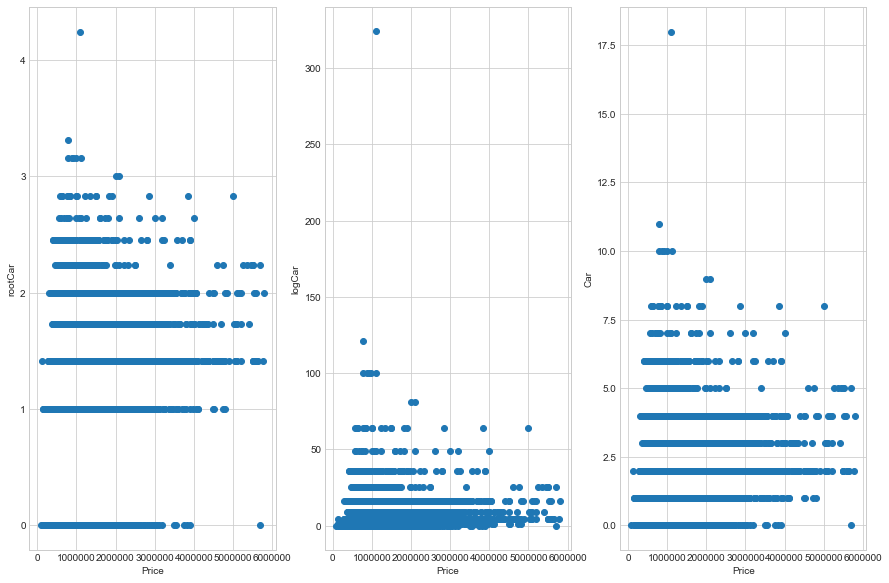

              Price       Car   rootCar  squareCar
Price      1.000000  0.203032  0.170836   0.149829
Car        0.203032  1.000000  0.926283   0.870069
rootCar    0.170836  0.926283  1.000000   0.674839
squareCar  0.149829  0.870069  0.674839   1.000000


In [107]:
housing['Car'] = pd.to_numeric(housing['Car'])

new8= housing[['Price','Car']]
new8.dropna(inplace=True)
new8 = new8[new8['Price'] < 6000000]
new8['rootCar'] = new8['Car'].apply(lambda x: x**0.5)
new8['squareCar'] = new8['Car'].apply(lambda x: (x)**2) 

plt.figure(figsize=(15,10))
plt.subplot(131)
plt.scatter(new8['Price'],new8['rootCar'])
plt.xlabel('Price')
plt.ylabel('rootCar')

plt.subplot(132)
plt.scatter(new8['Price'],new8['squareCar'])
plt.xlabel('Price')
plt.ylabel('logCar')


plt.subplot(133)
plt.scatter(new8['Price'],new8['Car'])
plt.xlabel('Price')
plt.ylabel('Car')
plt.show()

print(new8.corr())

In [108]:
newhousing = housing[['Price','Distance','Rooms','Bedroom2']]
newhousing1 = pd.concat([newhousing, new4['rootLandsize'],new5['years_old'],new6['sqrtBuildingArea'],new8['Car']], axis=1)
newhousing1.dropna(inplace=True)
print(newhousing1.shape)
newhousing1.head()

(8886, 8)


,Price,Distance,Rooms,Bedroom2,rootLandsize,years_old,sqrtBuildingArea,Car
2,1035000.0,2.5,2,2.0,12.489996,118.0,5.741837,0.0
4,1465000.0,2.5,3,3.0,11.575837,118.0,7.420557,0.0
6,1600000.0,2.5,4,3.0,10.954451,4.0,7.259644,2.0
11,1876000.0,2.5,3,4.0,15.652476,108.0,8.489610,0.0
14,1636000.0,2.5,2,2.0,16.000000,128.0,6.482664,2.0


In [109]:
corrdf = newhousing1.corr()
corrdf.iloc[:1,:]

,Price,Distance,Rooms,Bedroom2,rootLandsize,years_old,sqrtBuildingArea,Car
Price,1.0,-0.236257,0.482978,0.468021,0.226833,0.316568,0.525541,0.208959


In [111]:
from sklearn.ensemble import RandomForestRegressor

data = newhousing1.drop('Price',axis=1)
target = newhousing1.Price

rfc = RandomForestRegressor()

rfc.fit(data, target)
print('R-squared for train model:',rfc.score(data, target))
importance = pd.DataFrame(index=data.columns)
importance['score'] = rfc.feature_importances_
importance.sort_values('score', ascending=False)

R-squared for train model: 0.9447509744083425


,score
sqrtBuildingArea,0.405857
Distance,0.239546
years_old,0.169086
rootLandsize,0.118928
Rooms,0.029783
Car,0.020009
Bedroom2,0.016791


In [113]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(data,target)
print('R-squared for model:',lasso.score(data, target))

importancedlasso = pd.DataFrame(index=data.columns)
importancedlasso['score'] = lasso.coef_
importancedlasso.sort_values('score', ascending=False)


R-squared for model: 0.5161381835702966


,score
Rooms,149427.751517
sqrtBuildingArea,149289.782897
Car,46634.597028
Bedroom2,45712.397120
rootLandsize,4906.441948
years_old,4138.812347
Distance,-33536.377327


### Creating new dataframe after feature engineering

### Estimating parameters for Linear Regression

In [115]:
modelHousing = newhousing1[['Price','sqrtBuildingArea','years_old','Rooms','Bedroom2']]
modelData = newhousing1.drop('Price',axis=1)
modelTarget = newhousing1.Price

In [116]:
# running linear regression statsmodels with less features removed based on pvalues
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(modelData, modelTarget, test_size=0.2, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
print('R-squared test',lr.score(X_test,y_test))
print('R-squared train:',lr.score(X_train,y_train))
print(cross_val_score(lr, modelData, modelTarget, cv=8))

R-squared test 0.5340493744730463
R-squared train: 0.5113801532042714
[0.5121693  0.59200106 0.50206319 0.50963901 0.47800713 0.45684211
 0.40409153 0.47965485]


### Establishing parameters for KNN Regression

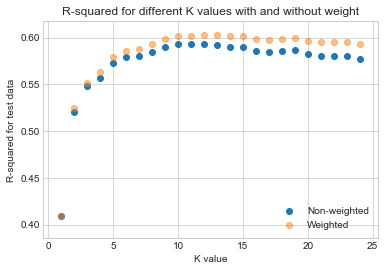

[0.55012871 0.61319371 0.46150349 0.52513609 0.52478097 0.56182235
 0.56954032 0.59917109]


In [117]:
from sklearn import neighbors

KNNTest = []
for n in range(1,25,1):
    knn = neighbors.KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    KNNTest.append(knn.score(X_test, y_test))
KNNTestWeight = []
for n in range(1,25,1):
    knnWeight = neighbors.KNeighborsRegressor(n_neighbors=n,weights='distance')
    knnWeight.fit(X_train, y_train)
    KNNTestWeight.append(knnWeight.score(X_test, y_test))

sns.set_style('whitegrid')
plt.scatter(range(1,25,1), KNNTest)
plt.scatter(range(1,25,1), KNNTestWeight,alpha=0.5)
plt.xlabel('K value')
plt.ylabel('R-squared for test data')
plt.legend(['Non-weighted','Weighted'],loc='best')
plt.title('R-squared for different K values with and without weight')
plt.show()

print(cross_val_score(knnWeight, modelData, modelTarget, cv=8))

### Establishing parameters for Decision Tree regression

In [118]:
from sklearn import tree

dTree = tree.DecisionTreeRegressor(
    max_features='auto',
    max_depth=8,
    )

dTree.fit(X_train, y_train)
print('R-squared for train model:',dTree.score(X_train, y_train))
print('R-squared for test model:',dTree.score(X_test, y_test))
cross_val_score(dTree, modelData, modelTarget, cv=8)

R-squared for train model: 0.7792655454554831
R-squared for test model: 0.6262959121525239


array([0.55282416, 0.6369583 , 0.51441515, 0.58556752, 0.53322572,
       0.60761554, 0.58480051, 0.56668059])

In [119]:
treeDepth = []
count = {}
for i in range(1,200,1):
    count_ = {}
    for n in range(1,20,1):
        tree1 = tree.DecisionTreeRegressor(max_features='auto', max_depth=n)
        tree1.fit(X_train, y_train)
        treeDepth.append(tree1.score(X_test, y_test))

        count_[n] = tree1.score(X_test,y_test)
        
    maxaccuracy = max(count_.values())
    result = []
    for key in count_.keys():
        if count_[key] == maxaccuracy:
            result.append(key)
    for r in result:
        if r in count:
            count[r] +=1
        else:
            count[r]=1

In [121]:
count

{8: 124, 7: 59, 6: 12, 9: 4}

### Establishing parameters for Random Forest

In [122]:
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor()

rfc.fit(X_train, y_train)
print('R-squared for train model:',rfc.score(X_train, y_train))
print('R-squared for test model:',rfc.score(X_test, y_test))
cross_val_score(rfc, modelData, modelTarget, cv=8)

R-squared for train model: 0.9420032939453504
R-squared for test model: 0.7082666436219356


array([0.65304498, 0.68892684, 0.55266468, 0.63685197, 0.69162552,
       0.66174903, 0.68775749, 0.69205758])

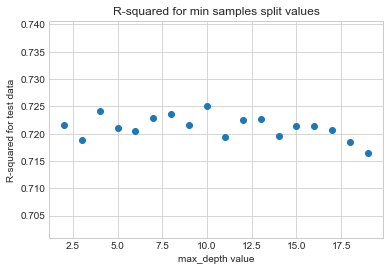

In [142]:
rfcDepth = []
for n in range(2,20,1):
    forest = RandomForestRegressor(n_estimators=100, max_features='auto',min_samples_split=n)
    forest.fit(X_train, y_train)
    rfcDepth.append(forest.score(X_test, y_test))

sns.set_style('whitegrid')
plt.scatter(range(2,20,1), rfcDepth)
plt.xlabel('max_depth value')
plt.ylabel('R-squared for test data')
plt.title('R-squared for min samples split values')
plt.show()

### Establishing parameters for SVR

In [139]:
from sklearn.svm import SVR

svr = SVR(kernel='linear',C=350)

svr.fit(X_train, y_train)
print('R-squared for train model:',svr.score(X_train, y_train))
print('R-squared for test model:',svr.score(X_test, y_test))
cross_val_score(svr, modelData, modelTarget, cv=8)

R-squared for train model: 0.47261887873681113
R-squared for test model: 0.4950647419945012


array([0.41285172, 0.52880481, 0.55020653, 0.48595125, 0.48415907,
       0.4460046 , 0.3432536 , 0.44210555])

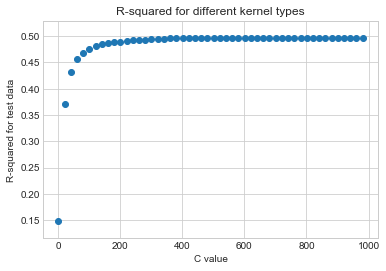

In [130]:
svrC = []
for n in range(1,1000,20):
    svr = SVR(kernel='linear',C=n)
    svr.fit(X_train, y_train)
    svrC.append(svr.score(X_test, y_test))

sns.set_style('whitegrid')
plt.scatter(range(1,1000,20), svrC)
plt.xlabel('C value')
plt.ylabel('R-squared for test data')
plt.title('R-squared for different C values')
plt.show()

LR: 0.486426 (0.098016)
KNN: 0.559848 (0.085123)
Tree: 0.575189 (0.089791)
RFT: 0.681716 (0.079964)
SVM: 0.459125 (0.104244)


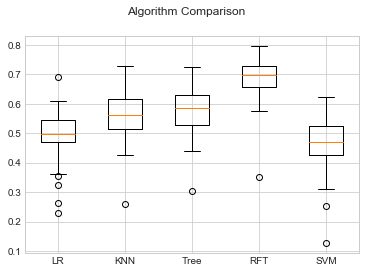

In [149]:
# prepare configuration for cross validation test harness
# prepare models max_depth=5
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', neighbors.KNeighborsRegressor(n_neighbors=12,weights='distance')))
models.append(('Tree', tree.DecisionTreeRegressor(max_features='auto', max_depth=8)))
models.append(('RFT', RandomForestRegressor(n_estimators=100, max_features='auto',min_samples_split=8)))
models.append(('SVM', SVR(kernel='linear',C=400)))
# evaluate each model in turn
results = []
names = []
#scoring = 'accuracy'
for name, model in models:    
    cv_results = cross_val_score(model.fit(X_train, y_train), modelData, modelTarget, cv=30 , scoring='r2')
    results.append(cv_results)
    names.append(name)    
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

###  Random Forest

In [152]:
rfc = RandomForestRegressor(n_estimators=100, max_features='auto',min_samples_split=8)

rfc.fit(X_train, y_train)
print('R-squared for train model:',rfc.score(X_train, y_train))
print('R-squared for test model:',rfc.score(X_test, y_test))
cross_val_score(rfc, modelData, modelTarget, cv=8)

R-squared for train model: 0.9094836179675212
R-squared for test model: 0.7208422956203511


array([0.67454551, 0.7146267 , 0.5935536 , 0.67768018, 0.70110326,
       0.69986165, 0.70996824, 0.70880836])